# 1.Installation of Packages

In [13]:
!pip install -qq kuzu llama-index==0.10.33 llama-index-readers-web==0.1.10 llama-index-embeddings-openai llama-index-llms-openai llama-index-graph-stores-kuzu  pypdf pyvis  html2text umap-learn plotly

# 2.Import Required Packages


In [15]:
# Regular imports
import os
import kuzu                           # Graph database library
import pandas as pd
import numpy as np

from google.colab import userdata    # Importing specific functionality from google.colab

# Llama index imports
from llama_index.core import (
    StorageContext,
    ServiceContext,
    KnowledgeGraphIndex              # Index for knowledge graphs
)

from llama_index.readers.web import SimpleWebPageReader
from llama_index.llms.openai import OpenAI
from llama_index.graph_stores.kuzu import KuzuGraphStore

# Visualization libraries
import umap
import networkx as nx
import plotly.express as px
from pyvis.network import Network
from IPython.display import HTML, Markdown, display




# 3.Configue the Environment Setup


In [16]:
os.environ["OPENAI_API_KEY"] = userdata.get('oai')

## Define LLM


In [17]:
llm = OpenAI(temperature=0, model="gpt-3.5-turbo",api_key=userdata.get('oai'))
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=512)

<ipython-input-17-f6a1fa7cb0b0>:2: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(llm=llm, chunk_size=512)


#4.Prepare for Kùzu Database
Kùzu is an embedded graph database management system designed for high-speed query processing and scalability.

## Create graph db and initialise them.


In [18]:
#@title Choose your KG name { run: "auto" }
kg_name = "my_kg_1" # @param {type:"string"}

In [19]:
db = kuzu.Database(kg_name)
graph_store = KuzuGraphStore(db)

#5.Build your Knowledge Graph
The following code snippet is used to gather text data from a list of websites, which is a crucial step in building a knowledge graph. The websites list contains URLs of web pages related to Neurons Lab, a potential source of information for constructing the knowledge graph.


In this code, the SimpleWebPageReader class is utilized to extract text content from the specified URLs. By setting html_to_text=True, the HTML content of the web pages is converted to plain text, making it suitable for further processing in the knowledge graph construction pipeline.

In [20]:
websites = ["https://neurons-lab.com/",
            "https://neurons-lab.com/stories/",
            "https://neurons-lab.com/about-us/",
            "https://neurons-lab.com/talents/",
            "https://www.crunchbase.com/organization/neurons-lab",]
documents = SimpleWebPageReader(html_to_text=True).load_data(websites)

## Autogenerate Triplets

1. Utilize LLM to efficiently load data extracted from the website.
2. Employ chunking techniques to organize and structure the loaded data, optimizing it for subsequent processing stages.
3. Leverage LLM to detect and classify entities residing within the nodes of the data.
4. Thoroughly analyze the interconnectedness between these detected entities, unveiling intricate relationships and associations.


### Configurable param
`max_triplets_per_chunk`: The maximum number of triplets to extract.


### Existing KG Prompt
```
(
    "Some text is provided below. Given the text, extract up to "
    "{max_knowledge_triplets} "
    "knowledge triplets in the form of (subject, predicate, object).\n"
    "---------------------\n"
    "Example:"
    "Text: Alice is Bob's mother."
    "Triplets:\n(Alice, is mother of, Bob)\n"
    "Text: Philz is a coffee shop founded in Berkeley in 1982.\n"
    "Triplets:\n"
    "(Philz, is, coffee shop)\n"
    "(Philz, founded in, Berkeley)\n"
    "(Philz, founded in, 1982)\n"
    "---------------------\n"
    "Text: {text}\n"
    "Triplets:\n"
)
```

## Indexing

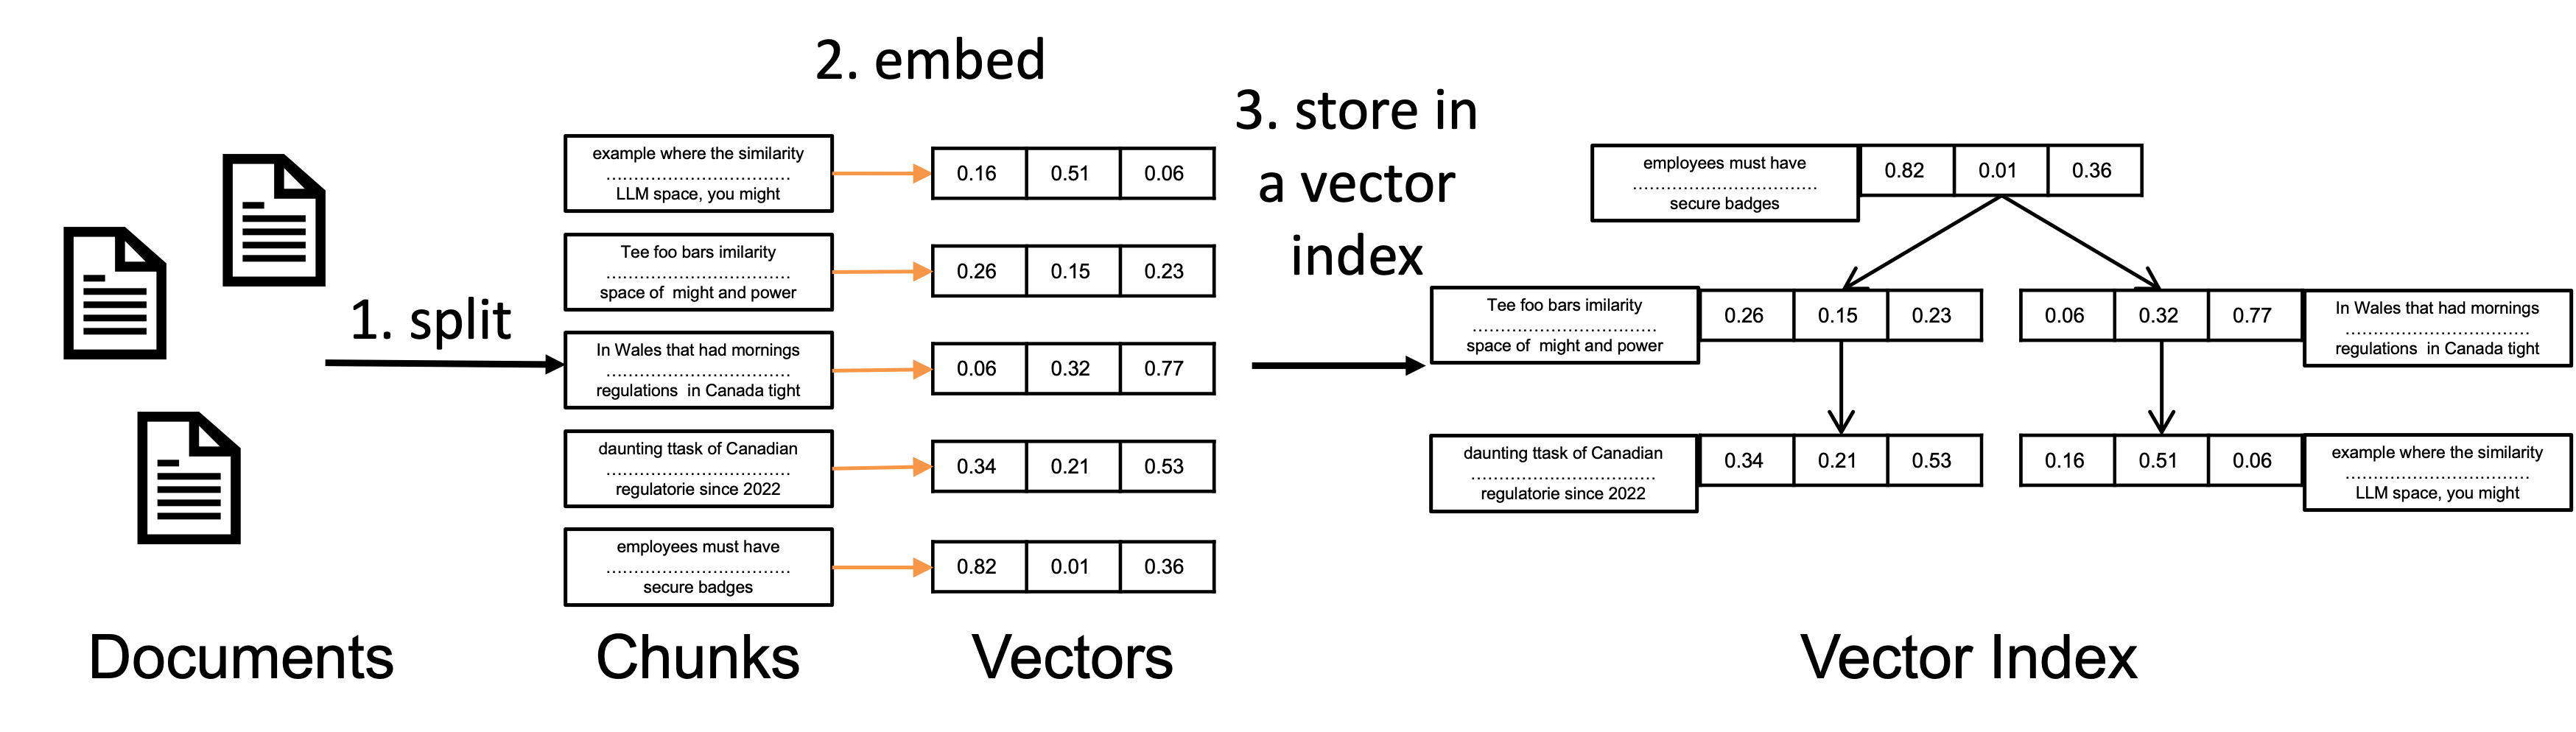

In [21]:
storage_context = StorageContext.from_defaults(graph_store=graph_store)
# NOTE: can take a while!
index = KnowledgeGraphIndex.from_documents(documents=documents,
                                           max_triplets_per_chunk=6,
                                          #  kg_triple_extract_template=new_kg_triple_extract,
                                           storage_context=storage_context,
                                           service_context=service_context,
                                           show_progress=True,
                                           include_embeddings=True)


Parsing nodes:   0%|          | 0/5 [00:00<?, ?it/s]

Processing nodes:   0%|          | 0/43 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/4 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/3 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/4 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings: 0it [00:00, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/4 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

#Custom Prompting

In [22]:
# from llama_index.core.prompts.base import PromptTemplate
# from llama_index.core.prompts.prompt_type import PromptType
# new_kg_triple_extract_template='''
#   You are an AI assistant that excels at extracting structured knowledge from unstructured text.
#   Extract up to {max_knowledge_triplets} knowledge triplets from the given text, in the form of (subject, predicate, object).
#   Focus on the most important facts and relationships.
#   Avoid stopwords in the triplets. Numeric values are allowed.

#   The triplets should be listed one per line. For example:

#   (Marie Curie, was, physicist)
#   (Marie Curie, conducted research on, radioactivity)
#   (Marie Curie, first woman to win, Nobel Prize)

#   If there are fewer than {max_knowledge_triplets} clear facts, it's okay to generate fewer triplets. Don't include any explanations or examples in your output, just the triplets themselves.

#   Here is the text to extract triplets from:

#   {text}

#   Triplets:
# '''

# new_kg_triple_extract = PromptTemplate(
#     new_kg_triple_extract_template,
#     prompt_type=PromptType.KNOWLEDGE_TRIPLET_EXTRACT
#     )


#6.Knowledge Graph Visualization

In [23]:

## Define the output directory for the graph
graph_output_directory = f'{kg_name}.html'

## Get the networkx graph from an index object (not shown in the provided code)
g = index.get_networkx_graph()

## Create a Network object with specific settings
net = Network(
    notebook=False,
    cdn_resources="remote",
    height="500px",
    width="60%",
    select_menu=True,
    filter_menu=False,
)

## Load the networkx graph into the Network object
net.from_nx(g)

## Apply the force atlas 2 algorithm to arrange the nodes
net.force_atlas_2based(central_gravity=0.015, gravity=-31)

## Save the graph to the specified output directory
net.show(graph_output_directory, notebook=False)

## Display the graph in the Jupyter Notebook
HTML(filename=graph_output_directory)


my_kg_1.html


# Share your amazing Knowledge Graph

Take the screenshot of the kg and share it with us over this link.

https://jamboard.google.com/d/1B6fXX8dxPj0QejSQb4XXG2HpZQBUI-_-15tkNZU99F4/edit?usp=sharing

In [24]:
# Utility to download your KG
# import zipfile
# import os

# def zip_folder(folder_path, zip_path):
#     with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for root, dirs, files in os.walk(folder_path):
#             for file in files:
#                 zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# # Example usage
# folder_path = "/content/my_kg_1"
# zip_path = '/content/my_kg_1.zip'
# zip_folder(folder_path, zip_path)


# !unzip /content/my_kg_1.zip -d /content/my_kg_1


#7.Querying the Knowledge Graph

####Response Modes

`tree_summarize`: Concatenate the chunks as much as possible to fit within the context window using the summary_template prompt, and split them if needed (again with a TokenTextSplitter and some text overlap).
> Good for summarization purposes.

`refine`: create and refine an answer by sequentially going through each retrieved text chunk. This makes a separate LLM call per Node/retrieved chunk.

> Good for more detailed answers.

`compact (default)`: similar to refine but compact (concatenate) the chunks beforehand, resulting in less LLM calls.
> In short, it is like refine, but with less LLM calls.





#### Other important parameters

`graph_store_query_depth`: This parameter likely controls the depth of the query when retrieving information from the graph store. A higher depth means that the system will look further into the connections between entities, potentially returning more comprehensive information about the relationships involving the query subject.

`similarity_top_k`: This parameter control the number of top similar entities or relationships to retrieve based on similarity scores. In the context of embedding-based retrieval, this would limit the results to the top k entities or relationships that are most similar to the query, as determined by their embedding vectors.

In [25]:
# Util function to plot the subgraph
def plot_subgraph_via_edges(input_data, graph_output_directory):
    # Extract kg_rel_texts values
    edges = []
    for key, value in input_data.items():
        if 'kg_rel_texts' in value:
            edges.extend(value['kg_rel_texts'])

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for edge_str in edges:
        # Parse the string to extract node and edge information
        source, action, target = eval(edge_str)
        G.add_edge(source, target, label=action)

    # Create a Network object with specific settings
    net = Network(
        notebook=False,
        cdn_resources="remote",
        height="500px",
        width="60%",
        select_menu=True,
        filter_menu=False,
    )

    # Load the networkx graph into the Network object
    net.from_nx(G)

    # Apply the force atlas 2 algorithm to arrange the nodes
    net.force_atlas_2based(central_gravity=0.015, gravity=-31)

    # Save the graph to the specified output directory
    net.show(graph_output_directory, notebook=False)

    # Display the graph in the Jupyter Notebook
    return HTML(filename=graph_output_directory)

## Query with embeddings
Query using top 5 triplets plus keywords (duplicate triplets are removed)

![graph](https://raw.githubusercontent.com/goodrahstar/rag_llm_kg/main/img/retrive.png)

In [26]:
#@title Type your query
question = "i have a fintech usecase to solve fraud, how can neurons lab help me ?" # @param {type:"string"}
response_mode = "compact" # @param ["tree_summarize", "refine", "compact"]
graph_store_query_depth = 1 # @param {type:"slider", min:1, max:7, step:1}
similarity_top_k = 1 # @param {type:"slider", min:1, max:20, step:1}


query_engine = index.as_query_engine(
    include_text=True,
    response_mode=response_mode,
    graph_store_query_depth=graph_store_query_depth,
    similarity_top_k = similarity_top_k
)

response = query_engine.query(question)

display(Markdown(f"<b>{response}</b>"))


input_data = response.metadata
plot_subgraph_via_edges(input_data, 'subgraph1.html')

<b>Neurons Lab can help with your fintech use case concerning fraud by utilizing their AI expertise. Their team of AI experts can create customized AI solutions specifically designed for fraud detection and prevention in the fintech sector.</b>

subgraph1.html


#8. Play with embeddings

In [27]:
def get_embeddings_df(index):
    """
    Extracts embeddings from the index and converts them into a DataFrame.

    Args:
    - index: The index containing embeddings.

    Returns:
    - embeddings_df: DataFrame containing embeddings.
    """
    # Extract embeddings as a dictionary
    embeddings = index.index_struct.to_dict()

    # Convert embeddings dictionary to DataFrame and extract 'embedding_dict' column
    embeddings_df = pd.DataFrame.from_dict(embeddings)['embedding_dict']

    # Drop rows with NaN values
    embeddings_df = embeddings_df.dropna()

    return embeddings_df


embedding_series = get_embeddings_df(index)

In [28]:
embedding_df = pd.DataFrame(embedding_series.tolist(), columns=[f'dim_{i+1}' for i in range(len(embedding_series[0]))])
embedding_df.index = embedding_series.index

source_node = [element.split(',')[0][2:-1] for element in embedding_df.index]
source_node[0:5]

['Neurons-lab', 'Neurons-lab', 'Neurons-lab', 'Neurons-lab', 'Neurons-lab']

In [29]:
embedding_df.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_1527,dim_1528,dim_1529,dim_1530,dim_1531,dim_1532,dim_1533,dim_1534,dim_1535,dim_1536
"('Neurons-lab', 'Is', 'Ai solution development experts')",0.001776,0.003566,-0.005041,0.013327,-0.000127,0.011271,-0.001765,0.009852,-0.001340,-0.018306,...,0.023829,0.005849,0.041450,-0.013439,-0.046372,-0.009384,0.013047,-0.043324,-0.019550,-0.027787
"('Neurons-lab', 'Seeking', 'Innovation')",-0.031026,0.006963,-0.002189,0.003030,-0.005326,0.021822,0.005550,0.008129,-0.020558,-0.019658,...,0.014319,0.004904,0.034877,-0.014263,-0.043982,0.005754,0.007911,-0.021106,-0.018113,-0.033078
"('Neurons-lab', 'Partner with', 'Us')",-0.012255,-0.006099,0.008669,-0.000195,-0.006968,0.020980,0.019926,0.016973,-0.011657,-0.010989,...,0.025115,0.001995,0.029586,0.009970,-0.042045,0.000057,0.011854,-0.021993,-0.018281,-0.025452
"('Neurons-lab', 'Holds', 'Generative ai competency')",-0.016114,0.001556,0.001041,-0.004287,-0.009696,0.023452,-0.007757,0.013547,-0.011845,-0.041770,...,0.028545,0.029047,0.018555,-0.005493,-0.039873,-0.010205,0.007541,-0.033176,-0.011189,-0.015863
"('Neurons-lab', 'Offers', 'Ai feasibility analysis')",-0.013800,-0.001991,-0.004221,-0.013737,-0.005875,0.006995,-0.011462,0.011082,-0.005204,-0.021701,...,0.019819,0.005053,0.025985,-0.000639,-0.041717,-0.021758,-0.001143,-0.028963,-0.012311,-0.023710


In [30]:

def visualize_embeddings(embedding_series, n_neighbors=15, min_dist=0.1, n_components=3):
    # Convert Series to DataFrame
    embedding_df = pd.DataFrame(embedding_series.tolist(), columns=[f'dim_{i+1}' for i in range(len(embedding_series[0]))])

    # Perform UMAP dimensionality reduction
    umap_embedded = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        random_state=42,
    ).fit_transform(embedding_df.values)

    # Plot the UMAP embedding
    umap_df = pd.DataFrame(umap_embedded, columns=['UMAP Dimension 1', 'UMAP Dimension 2','UMAP Dimension 3'])
    umap_df['Label'] = embedding_series.index
    # Plot the UMAP embedding using Plotly Express
    fig = px.scatter_3d(umap_df, x='UMAP Dimension 1',
                        y='UMAP Dimension 2',
                        z='UMAP Dimension 3',
                        hover_data=['Label'],
                        title='UMAP Visualization of Embeddings',
                        color = source_node
                        )
    fig.show()


visualize_embeddings(embedding_series)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
